# CASE STUDY

You work for an e-commerce company ABC, and you’ve been asked to analyze and present your findings to the Sales 
and the Operations heads. The solution should include a summary of current state of the business, business and 
customer trends that you observe from the data and a proposal (if any) for areas where you think the company can 
improve. 
Here are some assumptions you’ll consider on the data that has been shared: 
• It’s currently September 2018 (e.g., filter out all data after September 2018)  
• The company’s inception was January 2017 (so you can filter out all data before January 2017)  
• Company is US-based, but launched in Brazil (which is why some information is in Portuguese)  
• You can assume all orders are delivered (so ignore the order state field) 
Build a framework to answer the questions. If you’re not sure what the questions are, create questions for yourself to 
answer. It makes the process of digging for data so much easier. It’s hard to come up with an answer if you don’t know 
what the questions are. If you’re not sure what the question at hand is, you might need to play with the data a bit to 
understand what seems to be the problem at hand. For this particular case, the ask is really clear, you need to create a 
summary which includes current state of the business, business trends that you observe from the data and a proposal (if 
any) for areas where you think the company can improve. 
Here are a few pointers to help you get started: 
• Current State → Reflect on the current state of business.  
• Revenue → how much money are we making?  
• Volume of sales → how many orders are we getting?  
• Customer summary based on spend + behavior.  
• Are there any trends that you observe in the customer’s spend?  
• How should we present customer satisfaction?  
• Is customer satisfaction a problem? What are your observations?

In [10]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [175]:
# Importing all required packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from datetime import datetime 

In [282]:
# Reading all the files
#importing the dataset 
orders = pd.read_csv('olist_orders_dataset.txt', sep=',', encoding='utf-8', quotechar='"', parse_dates=['order_purchase_timestamp'])
customers = pd.read_csv('olist_customers_dataset.txt', sep=',', encoding='utf-8', quotechar='"')
order_item = pd.read_csv('olist_order_items_dataset.txt', sep=',', encoding='utf-8', quotechar='"')
order_payments = pd.read_csv('olist_order_payments_dataset.txt', sep=',', encoding='utf-8', quotechar='"')
order_review = pd.read_csv('olist_order_reviews_dataset.txt', sep=',', encoding='utf-8', quotechar='"')
product_category = pd.read_csv('olist_product_category_name_translation.txt', sep=',', encoding='utf-8', quotechar='"')
products = pd.read_csv('olist_products_dataset.txt', sep=',', encoding='utf-8', quotechar='"')



In [283]:
for col_name in ['order_approved_at', 'order_delivered_carrier_date','order_delivered_customer_date', 'order_estimated_delivery_date']:
    orders[col_name]=orders[col_name].apply(pd.to_datetime)

In [284]:
def make_null_by_date(val):
   
    if val.year==2017:
        return val
    else:
        return pd.NaT
        

In [285]:
order=orders[(orders["order_purchase_timestamp"]>="2017-01-01") & (orders["order_purchase_timestamp"]<="2017-12-31")]


In [286]:


#for col_name in ['order_approved_at', 'order_delivered_carrier_date','order_delivered_customer_date', 'order_estimated_delivery_date']:
#    order[col_name]=order[col_name].apply(make_null_by_date)
    

In [287]:
#Replacing the year 2018 with null values
#for col_name in ['order_approved_at', 'order_delivered_carrier_date','order_delivered_customer_date', 'order_estimated_delivery_date']:
#    print(col_name,order[col_name].dt.year.unique())

In [288]:
customers

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


In [289]:

#Dropping order state column since our assumption is Delivered
order.drop(["order_status"],axis=1,inplace=True)

In [290]:
order_item["order_id"]=order_item["order_id"].astype(str)
order["order_id"]=order["order_id"].astype(str)
orderitem=pd.merge(order,order_item,on="order_id")
order_items=pd.merge(orderitem,order_payments,on="order_id")
order_items=pd.merge(order_items,order_review,on="order_id")

In [291]:
products=pd.merge(products,product_category)
products.drop(["product_category_name"],axis=1,inplace=True)
products.rename(columns={"product_category_name_english":"product_category_name"},inplace=True)

In [292]:
order_product=pd.merge(order_items,products)

In [293]:
final_df=pd.merge(order_product,customers)

In [220]:
final_df.shape

(52918, 34)

In [221]:
final_df.isnull().sum()

order_id                             0
customer_id                          0
order_purchase_timestamp             0
order_approved_at                   14
order_delivered_carrier_date       760
order_delivered_customer_date     1360
order_estimated_delivery_date        0
order_item_id                        0
product_id                           0
seller_id                            0
price                                0
freight_value                        0
payment_sequential                   0
payment_type                         0
payment_installments                 0
payment_value                        0
review_id                            0
review_score                         0
review_comment_title             52904
review_comment_message           30139
review_creation_date                 0
review_answer_timestamp              0
product_name_lenght                  0
product_description_lenght           0
product_photos_qty                   0
product_weight_g         

In [222]:
final_df.columns

Index(['order_id', 'customer_id', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'order_item_id', 'product_id', 'seller_id', 'price', 'freight_value',
       'payment_sequential', 'payment_type', 'payment_installments',
       'payment_value', 'review_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'product_category_name', 'customer_unique_id',
       'customer_zip_code_prefix', 'customer_city', 'customer_state'],
      dtype='object')

In [294]:
final_df=final_df[['seller_id','order_id', 'customer_unique_id','product_id','customer_city', 'customer_state','product_category_name','order_purchase_timestamp','order_approved_at', 
        'order_delivered_carrier_date','order_delivered_customer_date', 'order_estimated_delivery_date',
        'price', 'freight_value',
       'payment_sequential', 'payment_type', 'payment_installments',
       'payment_value','review_score','review_comment_message', 'review_creation_date',
       'review_answer_timestamp', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       ]]

# Current State

In [239]:

# Calculate total sales revenue
total_sales_revenue = final_df['price'].sum()

# Calculate average order value
average_order_value = final_df.groupby('order_id')['price'].sum().mean()

# Calculate number of orders
number_of_orders = final_df['order_id'].nunique()

print("Total Sales Revenue:", total_sales_revenue)
print("Average Order Value:", average_order_value)
print("Number of Orders:", number_of_orders)


Total Sales Revenue: 6400097.430000001
Average Order Value: 146.3916702120907
Number of Orders: 43719


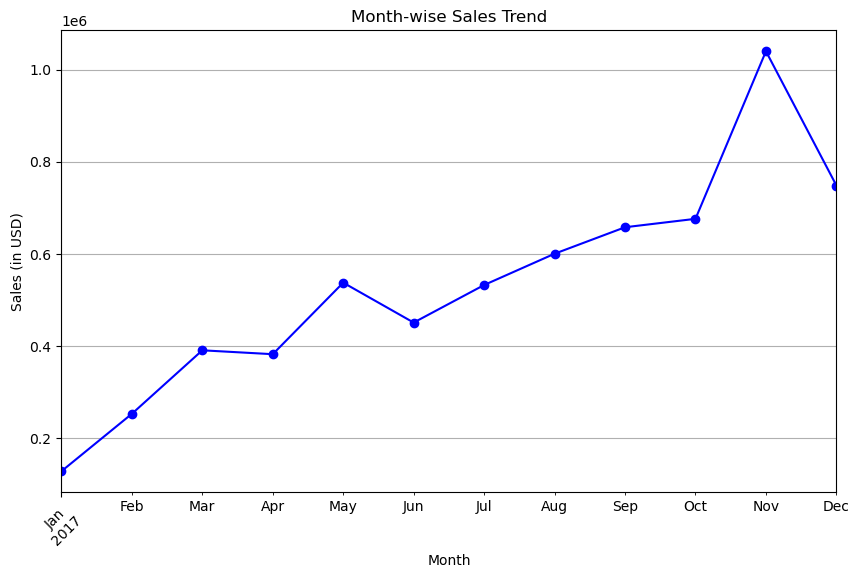

In [229]:
# Extract month and year from 'order_purchase_timestamp'
final_df['order_month'] = final_df['order_purchase_timestamp'].dt.to_period('M')

# Group by month and sum the sales
monthly_sales = final_df.groupby('order_month')['price'].sum()

# Plotting the month-wise sales trend
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='line', marker='o', color='b')
plt.title('Month-wise Sales Trend')
plt.xlabel('Month')
plt.ylabel('Sales (in USD)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [236]:


# Extract month from the order purchase timestamp
final_df['order_month'] = final_df['order_purchase_timestamp'].dt.month_name()

# Calculate total sales revenue per month
monthly_sales = final_df.groupby('order_month')['price'].sum()

# Calculate average monthly sales
average_monthly_sales = monthly_sales.mean()

# Find months with sales higher than average
months_above_average = monthly_sales[monthly_sales > average_monthly_sales]

# Find months with sales lower than average
months_below_average = monthly_sales[monthly_sales < average_monthly_sales]

print("Months with sales higher than the average sales:")
print(months_above_average)

print("\nMonths with sales lower than the average sales:")
print(months_below_average)


Months with sales higher than the average sales:
order_month
August        600610.58
December      748752.86
May           537745.51
November     1040287.53
October       676402.84
September     658124.40
Name: price, dtype: float64

Months with sales lower than the average sales:
order_month
April       382426.56
February    252932.96
January     128192.68
July        532670.52
June        451076.70
March       390874.29
Name: price, dtype: float64


Based on the above data the month November has the higest and Jan has the lowest revenue

<AxesSubplot:title={'center':'Weekly Sales Trend'}, xlabel='order_purchase_timestamp'>

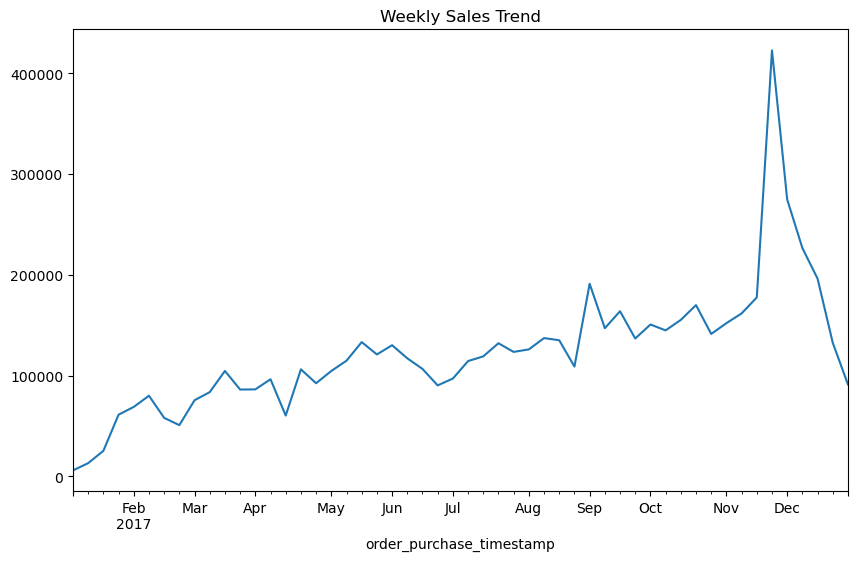

In [230]:
import pandas as pd

# Assuming your DataFrame is named final_df

# Convert 'order_purchase_timestamp' to datetime
final_df['order_purchase_timestamp'] = pd.to_datetime(final_df['order_purchase_timestamp'])

# Set 'order_purchase_timestamp' as the index
weekly_sales=final_df.set_index('order_purchase_timestamp')

# Resample the DataFrame to get weekly sales
weekly_sales = weekly_sales['price'].resample('W').sum()

# Plot the weekly sales trend
weekly_sales.plot(kind='line', figsize=(10, 6), title='Weekly Sales Trend')


INFERENCE

We can see that the weekly sales of products is highest during November & December, due to Year end Vacations (Christmas)

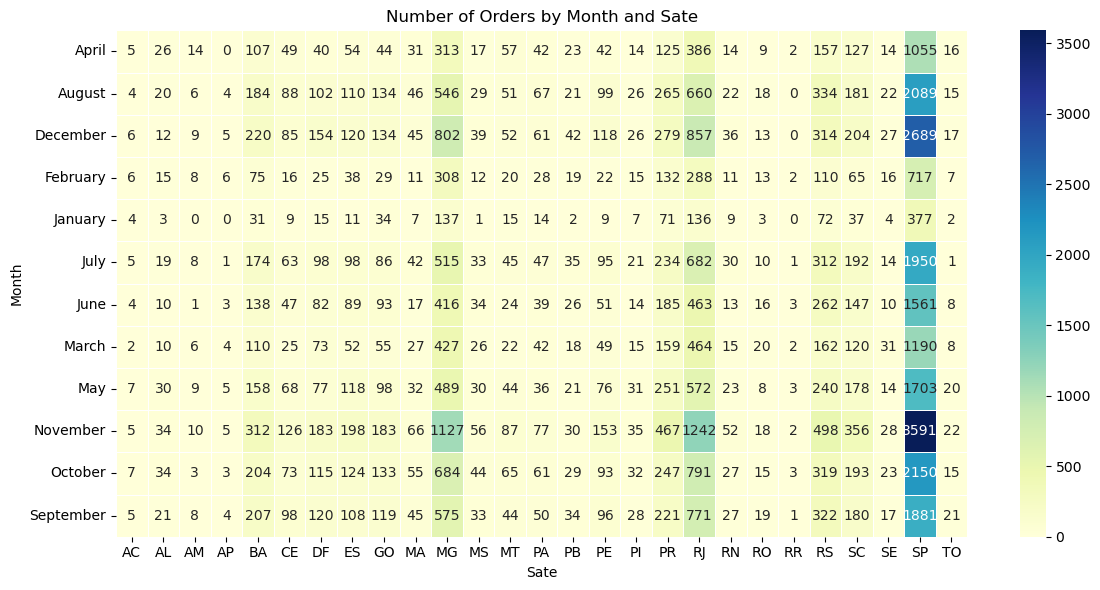

In [253]:

# Extract month and category name
final_df['order_month'] = final_df['order_purchase_timestamp'].dt.month_name()
categories = final_df['customer_state']

# Create a pivot table for number of orders per month and category
orders_pivot = final_df.pivot_table(index='order_month', columns='customer_state', aggfunc='size', fill_value=0)

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(orders_pivot, cmap='YlGnBu', annot=True, fmt="d", linewidths=0.5)
plt.title('Number of Orders by Month and Sate')
plt.xlabel('Sate')
plt.ylabel('Month')
plt.tight_layout()
plt.show()


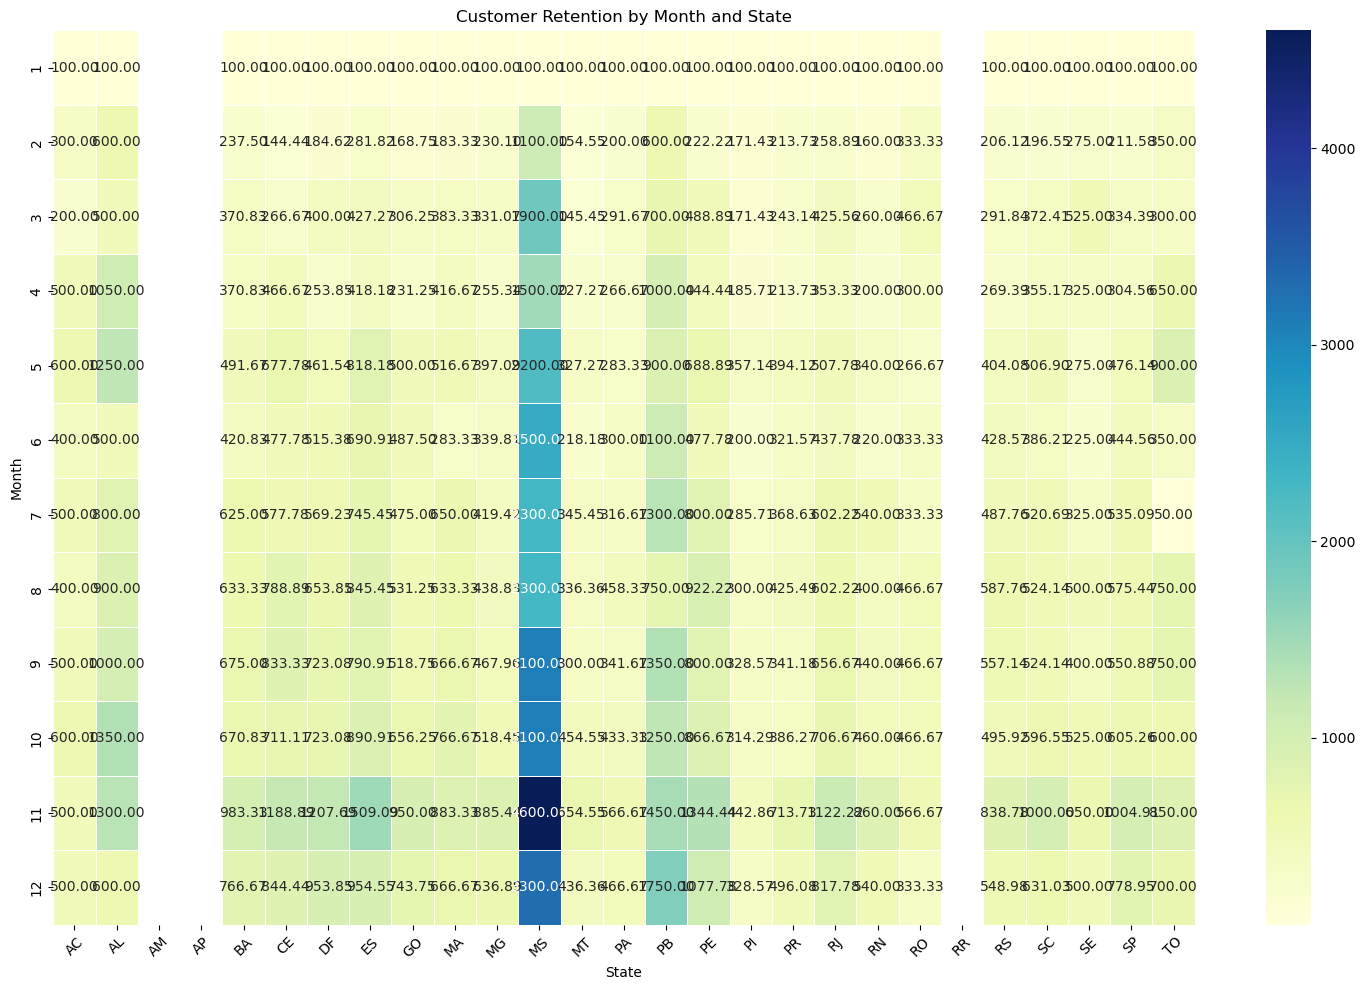

In [256]:
# Extract month and state
final_df['order_month'] = final_df['order_purchase_timestamp'].dt.month
states = final_df['customer_state']

# Calculate customer retention rates per month and state
retention_pivot = final_df.pivot_table(index='order_month', columns='customer_state', values='customer_unique_id', aggfunc='nunique')

# Calculate retention rate percentage
retention_pivot = retention_pivot.divide(retention_pivot.iloc[0], axis=1) * 100

# Plot heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(retention_pivot, cmap='YlGnBu', annot=True, fmt=".2f", linewidths=0.5)
plt.title('Customer Retention by Month and State')
plt.xlabel('State')
plt.ylabel('Month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


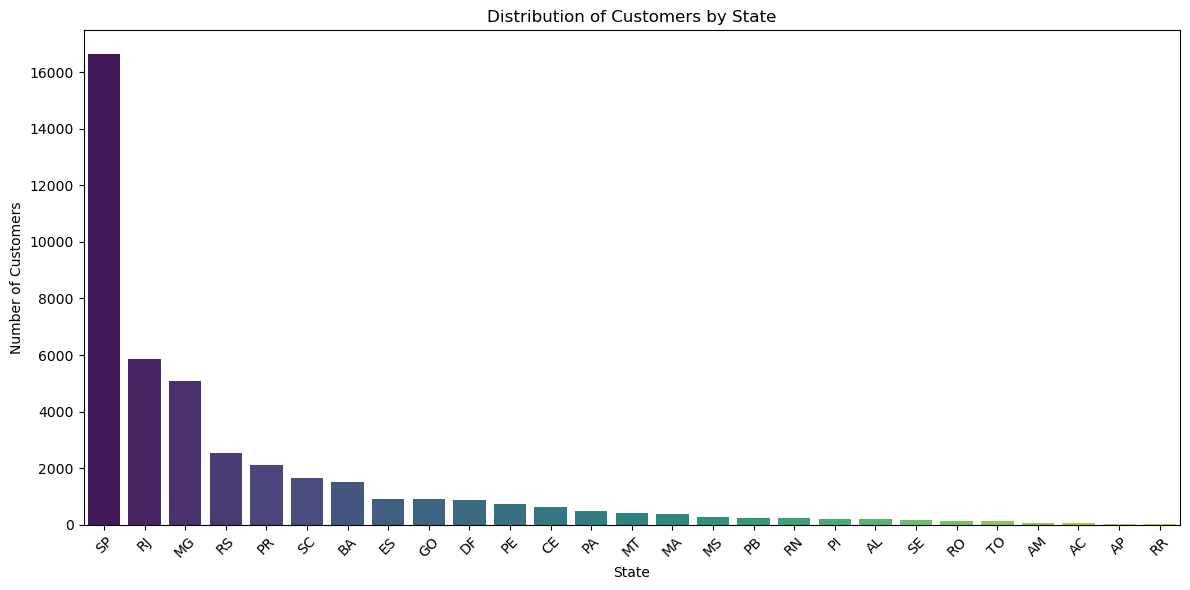

In [262]:
# Grouping data by state and counting the number of customers in each state
customer_distribution_by_state = final_df.groupby('customer_state')['customer_unique_id'].nunique().reset_index()

# Sorting data by the number of customers in descending order
customer_distribution_by_state = customer_distribution_by_state.sort_values(by='customer_unique_id', ascending=False)

# Plotting the distribution of customers by state
plt.figure(figsize=(12, 6))
sns.barplot(x='customer_state', y='customer_unique_id', data=customer_distribution_by_state, palette='viridis')
plt.title('Distribution of Customers by State')
plt.xlabel('State')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

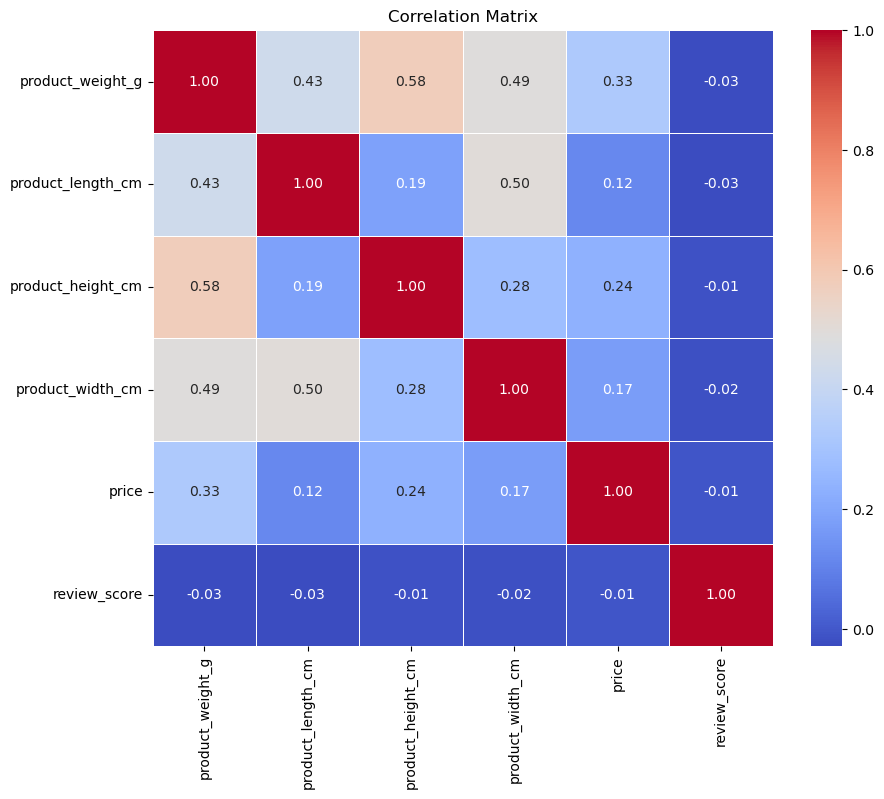

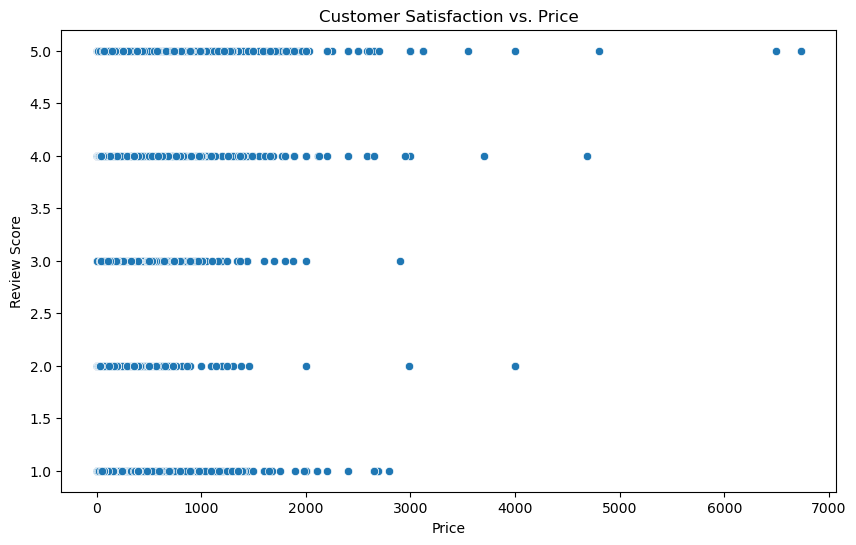

In [272]:
# Calculate correlation matrix
correlation_matrix = final_df[['product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm', 'price', 'review_score']].corr()

# Visualize correlation matrix as heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


# Plot customer satisfaction ratings vs. product characteristics
plt.figure(figsize=(10, 6))
sns.scatterplot(x='price', y='review_score', data=final_df)
plt.title('Customer Satisfaction vs. Price')
plt.xlabel('Price')
plt.ylabel('Review Score')
plt.show()


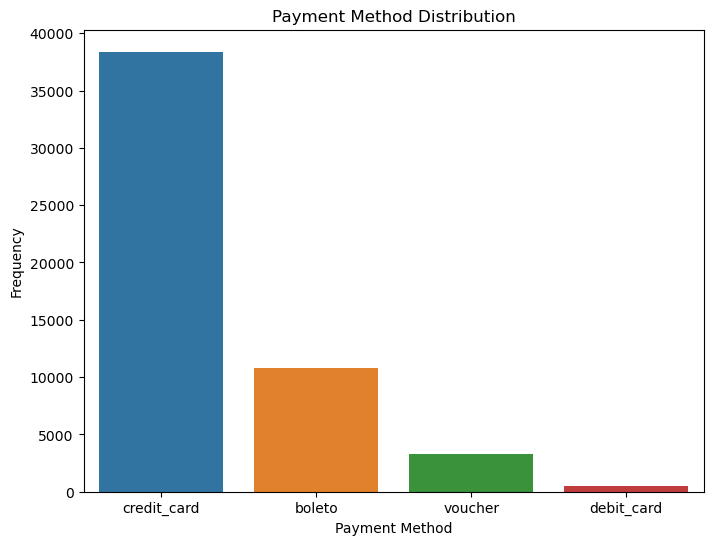

In [273]:
# Count the frequency of each payment method
payment_method_counts = final_df['payment_type'].value_counts()

# Plot payment method distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=payment_method_counts.index, y=payment_method_counts.values)
plt.title('Payment Method Distribution')
plt.xlabel('Payment Method')
plt.ylabel('Frequency')
plt.show()

In [ ]:
INFERENCE

We can see from above graph that the maximum purchase is being done using Credit card and least using debit card.

If the company wants to increase the sales, they can provide maximum promotional activities on credit card purchases.


In [ ]:
# Calculate average number of payment installments
average_installments = final_df['payment_installments'].mean()

# Plot payment installment trend over time (assuming date column is available)
plt.figure(figsize=(10, 6))
final_df['order_purchase_timestamp'] = pd.to_datetime(final_df['order_purchase_timestamp'])
final_df.set_index('order_purchase_timestamp', inplace=True)
final_df.resample('M')['payment_installments'].mean().plot(marker='o')
plt.title('Average Payment Installments Trend')
plt.xlabel('Month')
plt.ylabel('Average Payment Installments')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# CONCLUSION

1. From above , we can see that November & December has the highest sales due to holiday season, the company should plan for sales and discount events in the lean months to boost sales.

2. The proportion of number of customers is skewed towards state such as SP and RJ but the company can focus on other states to grow business 

3. It is observed from that the customer satisfaction is highest in the high price range products. The company should understand and focus on resolving customer dissatisfaction in the low price range products as maximum sales will be in low price range.


*****************